Installing Transformer

In [46]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import drive

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [48]:
import numpy as np
import os
import pandas as pd
import os
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#consistent sized plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12

#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

#text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
pd.options.display.max_columns = None

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale,StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.optimizers import RMSprop
from keras.models import Model
import tensorflow as tf
import torch

from warnings import filterwarnings
filterwarnings("ignore")

In [49]:
student_id = 2201829 # Note this is an interger and you need to input your id

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [50]:
# set same seeds for all libraries

#numpy seed
np.random.seed(student_id)
torch.manual_seed(student_id)

Mount Google Drive

In [51]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [52]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Train file: ', train_file)

List files:  ['test.csv', 'train.csv', 'valid.csv', 'models', '.ipynb_checkpoints', 'train_25.csv', 'train_75.csv', 'train_50.csv']
Train file:  gdrive/MyDrive/./CE807/Assignment2/2201829/train.csv


Creating all directories directories

In [53]:

MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1')              # Model 1

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25')

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50')

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75')

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100')

#---------------------------------------------------------------#               # Model 2

MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2')
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25')

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50')

MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75')

MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100')


Model 2 directory:  gdrive/MyDrive/./CE807/Assignment2/2201829/models/2


Output Directories

In [54]:
#Model 1

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') 

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv') 

model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv')

model_1_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv')

#------------------------------------------------------------------------#
#Model 2
model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv')

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') 

model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv') 

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') 

Creating data file different size

In [55]:
import pandas as pd

# Shuffle the dataset (optional)
data = pd.read_csv(train_file) 
dataset = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Create separate DataFrames for each class
df_not = dataset[dataset['label'] == 'NOT']
df_off = dataset[dataset['label'] == 'OFF']

# Calculate the number of samples to take from each class for 25%, 50% anf 75% split

split_size_25_off = int(len(df_off) * 0.3761)
split_size_25_not = int(len(df_not) * 0.1873)

split_size_50_off = int(len(df_off) * 0.752)
split_size_50_not = int(len(df_not) * 0.3746)

split_size_75_off = int(len(df_off))
split_size_75_not = int(len(df_not) * 0.6256)

# Take the first split_size samples from each class
df_25_class1 = df_not.iloc[:split_size_25_not]
df_25_class2 = df_off.iloc[:split_size_25_off]
df_50_class1 = df_not.iloc[:split_size_50_not]
df_50_class2 = df_off.iloc[:split_size_50_off]
df_75_class1 = df_not.iloc[:split_size_75_not]
df_75_class2 = df_off.iloc[:split_size_75_off]

# Concatenate the subsets for each class vertically
df_25 = pd.concat([df_25_class1, df_25_class2], ignore_index=True)
df_50 = pd.concat([df_50_class1, df_50_class2], ignore_index=True)
df_75 = pd.concat([df_75_class1, df_75_class2], ignore_index=True)

# Shuffle the combined dataset
df_25 = df_25.sample(frac=1, random_state=42).reset_index(drop=True)
df_50 = df_50.sample(frac=1, random_state=42).reset_index(drop=True)
df_75 = df_75.sample(frac=1, random_state=42).reset_index(drop=True)

# Reset the index of the extracted portions
train_25 = df_25.reset_index(drop=True)
train_50 = df_50.reset_index(drop=True)
train_75 = df_75.reset_index(drop=True)

# Specify the output directory
output_directory = 'gdrive/MyDrive/./CE807/Assignment2/2201829/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the divided datasets as separate CSV files in the output directory
train_25.to_csv(os.path.join(output_directory, 'train_25.csv'), index=False)
train_50.to_csv(os.path.join(output_directory, 'train_50.csv'), index=False)
train_75.to_csv(os.path.join(output_directory, 'train_75.csv'), index=False)


In [56]:
train_25 = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv')
train_50 = os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv')
train_75 = os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv')

## Exploratory Data Analysis

In [57]:
df = pd.read_csv(train_file)
val_df = pd.read_csv(val_file)
test_df = pd.read_csv(test_file)
df.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


Checking the shape of the train, valid and test dataset

In [58]:
df.shape, val_df.shape, test_df.shape

((12313, 3), (927, 3), (860, 3))

Check the data types of the columns

In [59]:
print(df.dtypes)
print(val_df.dtypes)
print(test_df.dtypes)

id        int64
tweet    object
label    object
dtype: object
id        int64
tweet    object
label    object
dtype: object
id        int64
tweet    object
label    object
dtype: object


Check for missing values

In [60]:
print("Missing values: ")
print("#---------Train data-------------#")
print(df.isnull().sum())
print("#---------Validation data------------#")
print(val_df.isnull().sum())
print("#----------Test data-----------------#")
print(test_df.isnull().sum())

Missing values: 
#---------Train data-------------#
id       0
tweet    0
label    0
dtype: int64
#---------Validation data------------#
id       0
tweet    0
label    0
dtype: int64
#----------Test data-----------------#
id       0
tweet    0
label    0
dtype: int64


Ploting pie chart to find the percentage of number of 'NOT' and 'OFF' classes in train, valid and test dataset.

In [61]:
def pie_chart(df):
  df['Count'] = df['label'].map(df['label'].value_counts())
  df['Percentage'] = (df['Count'] / df['Count'].sum()) * 100
  sizes = df.groupby('label')['Percentage'].first().values 
  return sizes

Text(0.5, 1.0, 'Test data')

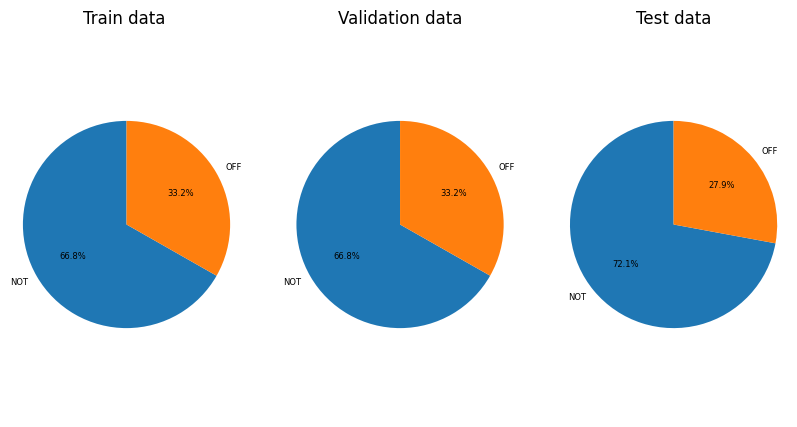

In [62]:
textprops = {'fontsize': 6}
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
label1 = df['label'].unique() 
label2 = df['label'].unique() 
label3 = df['label'].unique() 
size1 = pie_chart(df)
size2 = pie_chart(val_df)
size3 = pie_chart(test_df)
ax1.pie(size1, labels= label1, autopct='%1.1f%%', startangle=90, textprops=textprops)
ax1.axis('equal')
ax1.set_title( 'Train data ')
ax2.pie(size2, labels= label2, autopct='%1.1f%%', startangle=90, textprops=textprops)
ax2.axis('equal')
ax2.set_title( 'Validation data')
ax3.pie(size3, labels= label3, autopct='%1.1f%%', startangle=90, textprops=textprops)
ax3.axis('equal')
ax3.set_title( 'Test data')

Word frequency, which can be used to remove additional stop words.

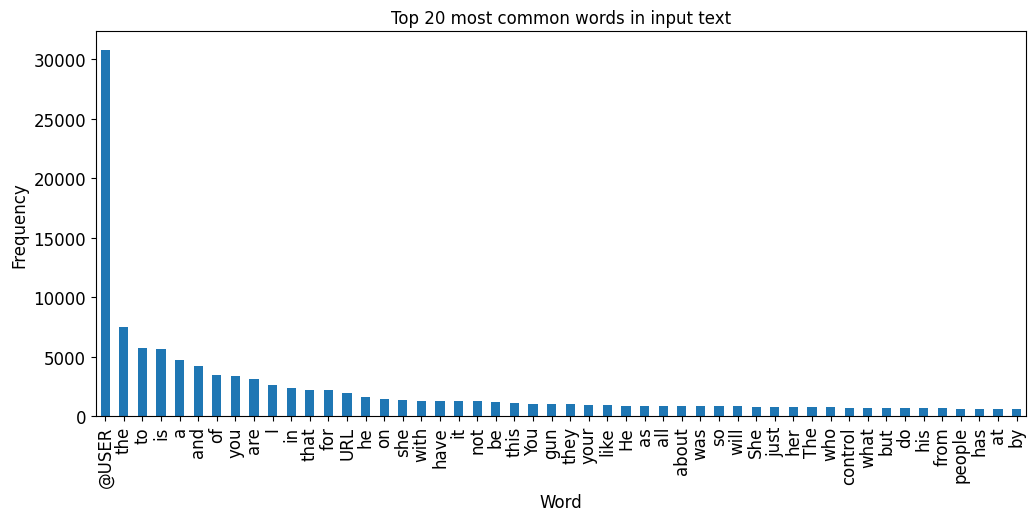

In [63]:
input_text_words = ' '.join(df['tweet']).split()
input_text_word_freq = pd.Series(input_text_words).value_counts()
input_text_word_freq[:50].plot(kind='bar')
plt.title('Top 20 most common words in input text')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

This can be also used for finding most frequent words

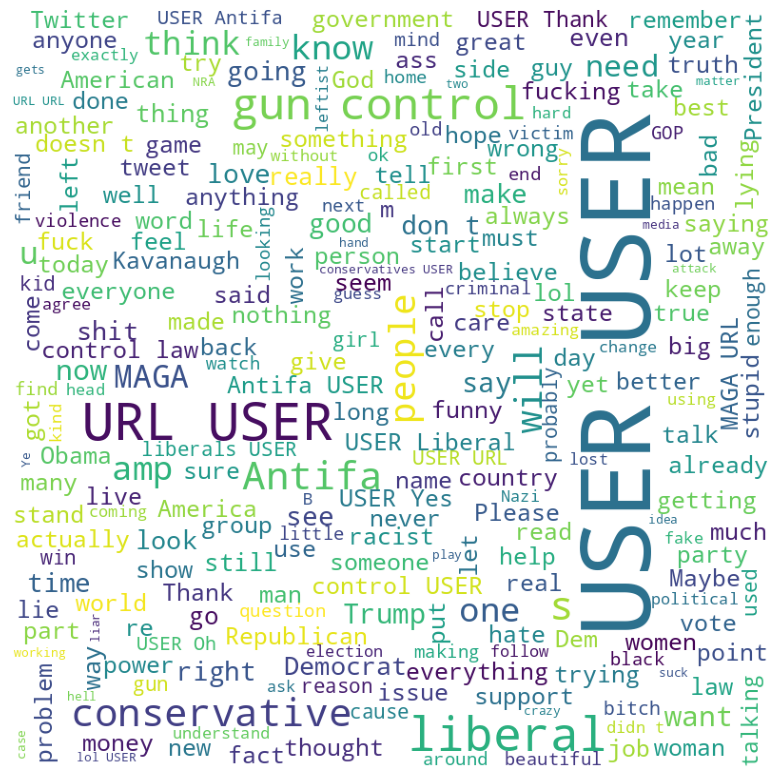

In [64]:
from wordcloud import WordCloud
wordcloud_input_text = WordCloud(width=800, height=800, background_color='white', max_words=250).generate(' '.join(df['tweet']))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_input_text)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

Function for calculating and displaying the evaluation matrices

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


def compute_performance(y_true, y_pred, clf):

  performance_dict = {} 
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  F1_score = f1_score(y_true, y_pred, average='macro')
  print("#---------------Evalution Results---------------------#")
  
  print(classification_report(y_true,y_pred))
  class_labels = ['NOT', 'OFF']
  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
  disp.plot()
  plt.show()
   # Plotting ROC Curve
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)
  print("Precision: {:.4f}".format(precision))
  print("Recall: {:.4f}".format(recall))
  print("F1_Score", F1_score)
  print("ROC Score :", roc_auc )

  performance_dict['precision'] = precision  
  performance_dict['recall'] = recall  
  performance_dict['F1_score'] = F1_score 
  performance_dict['roc_score'] = roc_auc

  # Plotting the ROC curve
  plt.figure(figsize=(10, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rat')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

  return performance_dict

Function for preprocessing which will be reused for the preprocessing for all datasets.Following are the preprocessing done:
1. Handle the diacritics in the text
2. Removing the stop words 
3. Spelling correction
4. Removing the hashtag symbol
5. Removing the short words of length 1 and 2 characters
6. Removing the digits
7. Removing non-alphanumeric values
8. Removing URLs
9. Remove all strings starting with @
10. Removing additional stop words

In [66]:
from textblob import TextBlob
nltk.download('punkt')
nltk.download("stopwords")

class pre_processing:
  def __init__(self,file):
    self.stop_words = set(stopwords.words('english'))
    self.file = file
    self.tokenizer = TweetTokenizer(preserve_case=True)


  def simplify(self, text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

  def remove_stopwords(self, text):                                             #Function to remove the stop words
    clean_text = [word for word in text if not word in self.stop_words]
    return clean_text  

  def spell_check(text):                                                        #Function to do spelling correction 
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return corrected_text

  def remove_hashsymbols(self, text):                                           #Function to remove the # symbol
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return self.tokenizer.tokenize(clean_text) 

  def rem_shortwords(self, text):
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in self.tokenizer.tokenize(new_text) if not len(word) in lengths]
        
    return new_text 

  def rem_digits(self, text):                                                   #Function to remove the digits from the list of strings
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)

  def rem_nonalpha(self, text):                                                 #Function to remove the non-alphanumeric characters from the text
    text = [word for word in text if word.isalpha()]
    return text

  def pre_process(self, file):
    data = pd.read_csv(file) 
    data.drop('id',axis=1,inplace=True)
    random = np.random.randint(0,len(data))
    data['tweet'] = data['tweet'].apply(self.simplify)

    
    data['tweet'].replace(r'@\w+','',regex=True,inplace=True)                   #remove all strings starting with @

                     
    data['tweet'].replace(r'http\S+','',regex=True,inplace=True)                  #remove all urls

    
    data['tweet'] = data['tweet'].apply(self.tokenizer.tokenize)                  #tokenize the tweets in the dataframe using TweetTokenizer
    
    stop_words = stopwords.words('english')

    
    additional_list = ['amp','rt','u',"can't",'ur']                               #add additional stop words to be removed from the text

    for words in additional_list:
        stop_words.append(words)

    data['tweet'] = data['tweet'].apply(self.remove_stopwords)
    
    data['tweet'] = data['tweet'].apply(self.remove_hashsymbols)                 #removing # symbols
  
    data['tweet'] = data['tweet'].apply(self.rem_shortwords)                     #Function to remove the short words of length one and two characters

    data['tweet'] = data['tweet'].apply(self.tokenizer.tokenize)

    data['label'] = data['label'].replace({'NOT': 0, 'OFF': 1}).values

    data['tweet'] = data['tweet'].apply(self.rem_digits)

    data['tweet'] = data['tweet'].apply(self.tokenizer.tokenize)

    data['tweet'] = data['tweet'].apply(self.rem_nonalpha)

    data['tweet'] = data['tweet'].apply(lambda x: ' '.join(x))                   #join the tokens back to form the string

    return data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Intalling joblib, which is used for saving the model to the drive

In [67]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Train Method 1

## BiLSTM

This cell is responsible for training the BiLSTM model, input data and validation data will be preprocessed. The preprocessed data will be vectorized and saved to drive. The preprocessed data is then tokenized using the Keras Tokenizer class, which turns the text into sequences of numbers. The word index used by the tokenizer is then recorded in a dictionary . To guarantee a constant input length for the LSTM layer, the sequences are then pad_sequences to a given length.And this will then passed to model for training and trained model will be saved to drive after validation using validation dataset.

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.optimizers import Adam
import tensorflow as tf
import pickle
import joblib

def train_method1(train_file, val_file, model_dir):
   
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    pre_pro = pre_processing(train_file)                                        # Preprocessing the data
    train_df = pre_pro.pre_process(train_file)
    print("Train data shape :", train_df.shape)
    val_df = pre_pro.pre_process(val_file)
   
    X_train = train_df['tweet']
    y_train= train_df['label']
    X_val= val_df['tweet']
    y_val= val_df['label']

    vectorizer = CountVectorizer()                                              #Vectorizing the preprocesed data and saving it to drive
    vectorizer.fit_transform(X_train)
    vectorizer.fit_transform(X_val)

    with open(model_dir + '/vectorizer.sav', 'wb') as file:
      pickle.dump(vectorizer, file)

    max_features = 10000
    embedding_dim = 128
    max_len=500

    tokenizer=Tokenizer(num_words=max_features,oov_token='</OOV>')
    tokenizer.fit_on_texts(X_train.values)
    dic=tokenizer.word_index

    X_train_seq = tokenizer.texts_to_sequences(X_train.values)
    X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)

    print("train data tensor:" ,X_train_pad.shape)

    X_val_seq = tokenizer.texts_to_sequences(X_val.values)
    X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

    print("test data tensor:" ,X_val_pad.shape)
                                                                                #Model Architecture of BiLSTM
    model= Sequential()                                
    model.add(Embedding(max_features,embedding_dim,input_length=max_len))
    model.add(Bidirectional(LSTM(128, dropout=0.3)))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='sigmoid'))

    model.summary()
   
    METRICS = [tf.keras.metrics.BinaryAccuracy(),                                 # For validation during trainng
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall")]

    model.compile(loss='binary_crossentropy',optimizer="adam",metrics=METRICS)

    epochs = 2
   
    history = model.fit(X_train_pad,y_train,validation_data=(X_val_pad,y_val), epochs=epochs)  # Fit the model using the train and test datasets.

    scores = model.evaluate(X_val_pad, y_val, return_dict=True)

    print(scores)
   
    train_loss = history.history['loss']                                         # Plot the training loss and validation loss
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss vs Validation Loss')
    plt.legend()
    plt.show()

  
    print("Validation Dataset Accuracy")
    y_val_pred = model.predict(X_val_pad)
    for i in range(len(y_val_pred)):
      if(y_val_pred[i] > 0.5):
          y_val_pred[i] = 1
      else:
          y_val_pred[i] =0 
    compute = compute_performance(y_val, y_val_pred, model)

    joblib.dump(model, model_dir + '/model.sav')                                 # Save the trained model and tokenizer using pickle
    joblib.dump(tokenizer, model_dir + '/tokenizer.sav')
    return compute

Test method of BiLSTM model, where model will be loaded from the drive and predict the classification data and calls compute_perform function for evaluating the model.

In [71]:
import pickle
import os
from sklearn import metrics
from tensorflow import keras
from keras import utils as keras_utils


def test_method1(test_file, model_file, output_dir):
    """
    Test a machine learning model on a test file.

    Args:
        test_file (str): File path of the test file.
        model_file (str): File path of the saved model file.
        output_dir (str): Directory path where the output files will be saved.

    Returns:
        dict: Dictionary containing computed performance metrics.
    """
    
    tokenizer = joblib.load(model_file +'/tokenizer.sav')


    # Load the trained model
    model = joblib.load(model_file  + '/model.sav')

    # Pre-process the test file
    pre_pro = pre_processing(test_file)
    test_df = pre_pro.pre_process(test_file) 

    X_test = test_df['tweet']
    y_test = test_df['label']
 
    # TEST
    X_test_seq = tokenizer.texts_to_sequences(X_test.values)
    X_test_pad = pad_sequences(X_test_seq, maxlen = 500)

    print("test data tensor:" ,X_test_pad.shape)

    scores = model.evaluate(X_test_pad, y_test, return_dict=True)

    print(scores)

    # Use the loaded model for testing on test data
    y_pred = model.predict(X_test_pad)

    for i in range(len(y_pred)):
      if(y_pred[i] > 0.5):
          y_pred[i] = 1
      else:
          y_pred[i] =0 

    #Saving the prdiction to the output directory
    mapping = {0: 'NOT', 1: 'OFF'}
    output_file = pd.read_csv(test_file)
    vfunc = np.vectorize(lambda x: mapping.get(x))
    y_pred_mapped = vfunc(y_pred)
    output_file['out_label'] = y_pred_mapped
    output_file.to_csv(output_dir, index=False)

    # Print accuracy score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Test Accuracy: {}'.format(accuracy))

    print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred)))
    compute = compute_performance(y_test, y_pred,model)

    return compute


##BiLSTM -  With 25 % datasize

Train data shape : (3078, 2)
train data tensor: (3078, 500)
test data tensor: (927, 500)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,576,193
Trainab

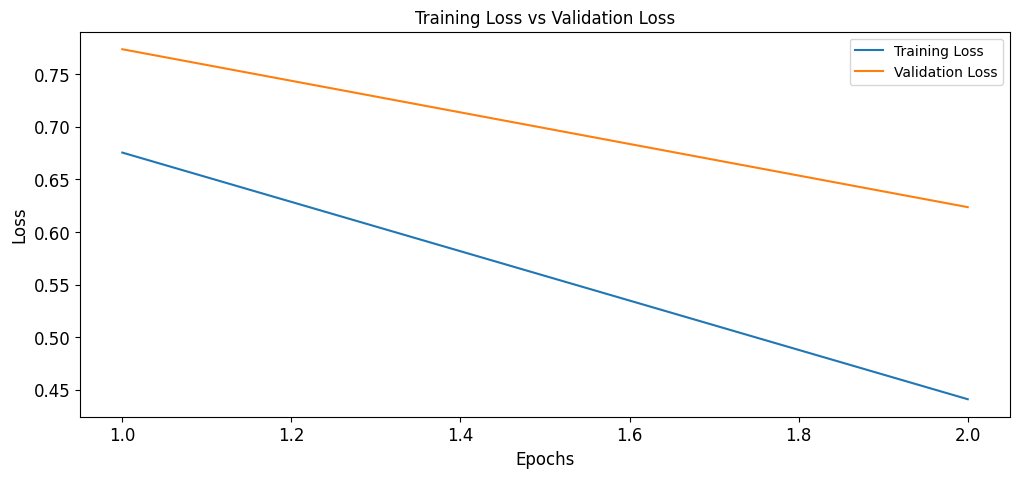

Validation Dataset Accuracy
29/29 [==============================] - 1s 12ms/step
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       619
           1       0.53      0.65      0.59       308

    accuracy                           0.69       927
   macro avg       0.67      0.68      0.67       927
weighted avg       0.71      0.69      0.70       927



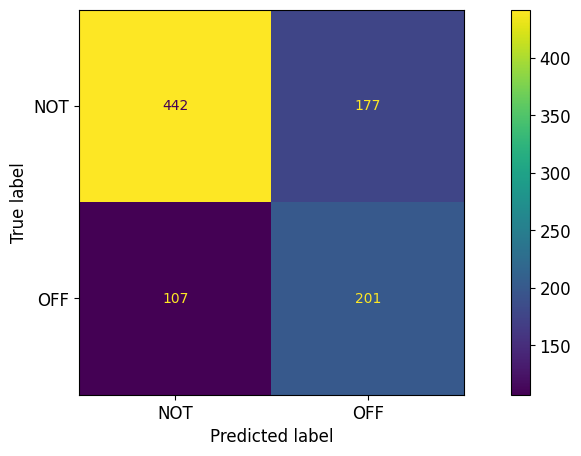

Precision: 0.5317
Recall: 0.6526
F1_Score 0.6714275729861416
ROC Score : 0.6833261649497514


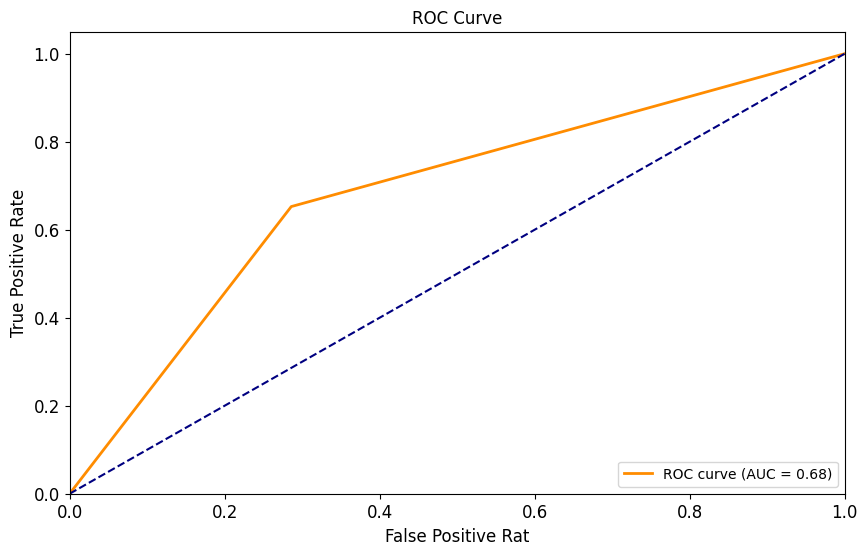

{'precision': 0.5317460317460317,
 'recall': 0.6525974025974026,
 'F1_score': 0.6714275729861416,
 'roc_score': 0.6833261649497514}

In [72]:
train_method1(train_25, val_file, MODEL_1_25_DIRECTORY)

test data tensor: (860, 500)
27/27 [==============================] - 1s 21ms/step - loss: 0.6313 - binary_accuracy: 0.7093 - precision: 0.4840 - recall: 0.6292
{'loss': 0.6313298940658569, 'binary_accuracy': 0.7093023061752319, 'precision': 0.4839743673801422, 'recall': 0.6291666626930237}
27/27 [==============================] - 1s 12ms/step
Test Accuracy: 0.7093023255813954
Test: 0.7093023255813954
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       620
           1       0.48      0.63      0.55       240

    accuracy                           0.71       860
   macro avg       0.66      0.68      0.67       860
weighted avg       0.74      0.71      0.72       860



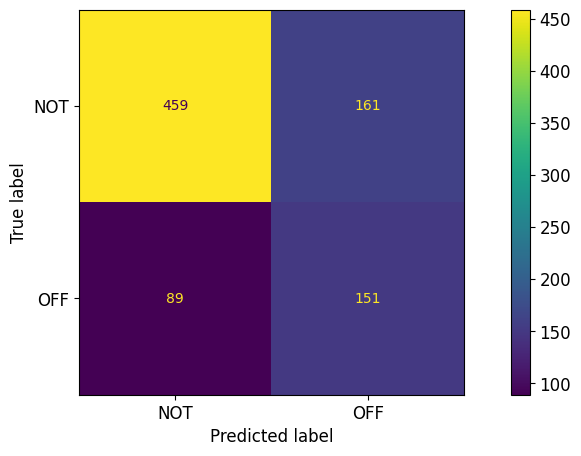

Precision: 0.4840
Recall: 0.6292
F1_Score 0.6665301766924756
ROC Score : 0.6847446236559139


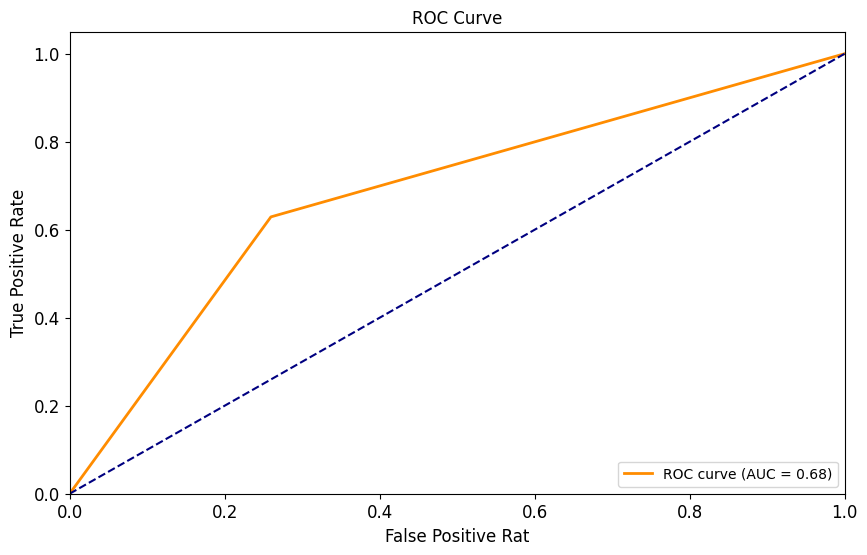

{'precision': 0.483974358974359,
 'recall': 0.6291666666666667,
 'F1_score': 0.6665301766924756,
 'roc_score': 0.6847446236559139}

In [73]:
test_method1(test_file, MODEL_1_25_DIRECTORY, model_1_25_output_test_file)

##BiLSTM - With 50% data in training set

Train data shape : (6156, 2)
train data tensor: (6156, 500)
test data tensor: (927, 500)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,576,193
Trainab

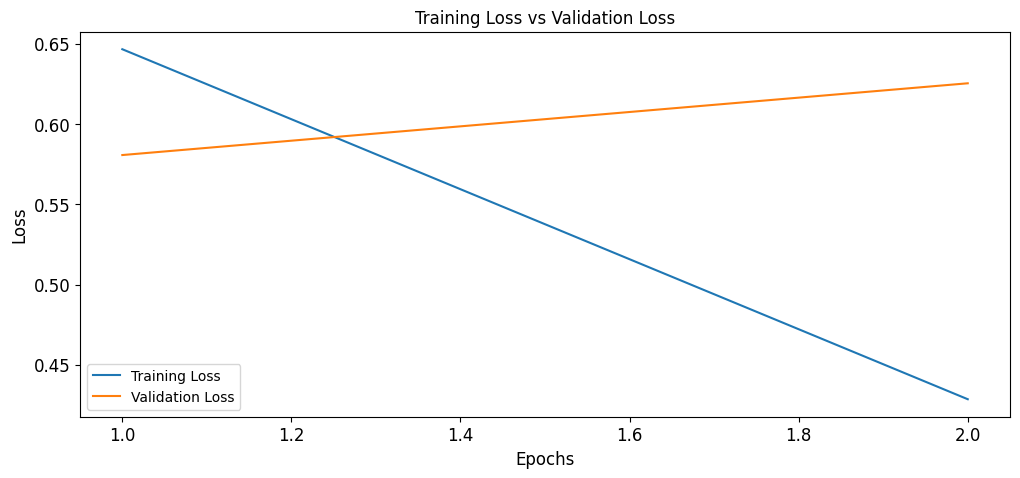

Validation Dataset Accuracy
29/29 [==============================] - 1s 16ms/step
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.87      0.64      0.73       619
           1       0.52      0.80      0.63       308

    accuracy                           0.69       927
   macro avg       0.70      0.72      0.68       927
weighted avg       0.75      0.69      0.70       927



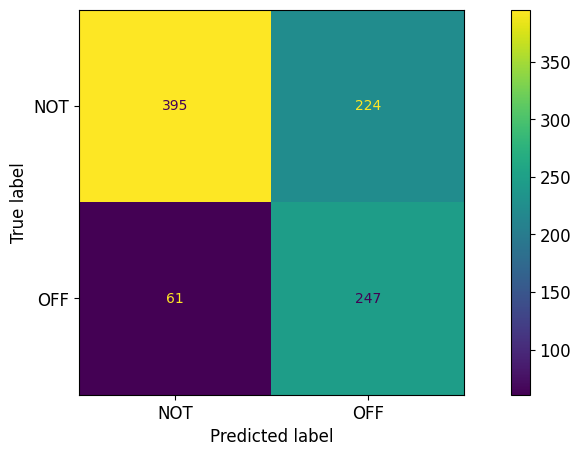

Precision: 0.5244
Recall: 0.8019
F1_Score 0.6845150311968236
ROC Score : 0.7200370308205526


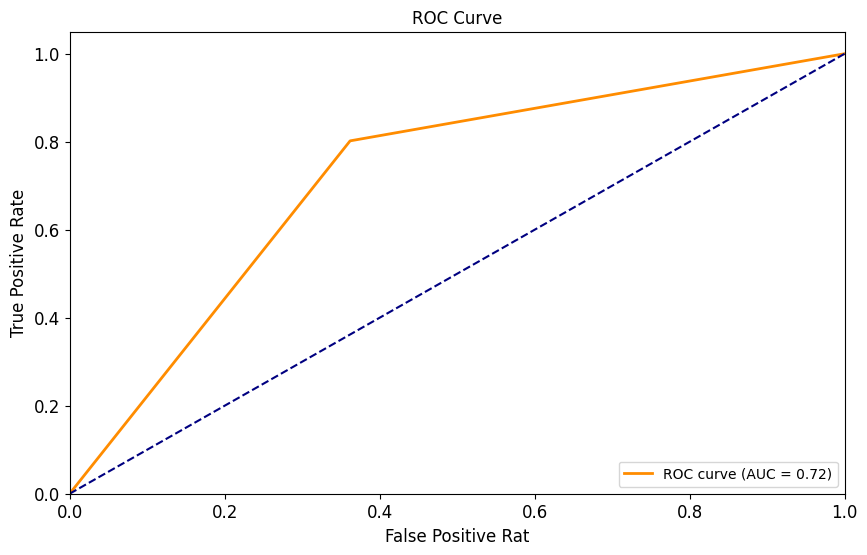

{'precision': 0.524416135881104,
 'recall': 0.801948051948052,
 'F1_score': 0.6845150311968236,
 'roc_score': 0.7200370308205526}

In [74]:
train_method1(train_50, val_file, MODEL_1_50_DIRECTORY)

test data tensor: (860, 500)
27/27 [==============================] - 2s 22ms/step - loss: 0.5936 - binary_accuracy: 0.6988 - precision: 0.4737 - recall: 0.7125
{'loss': 0.5936132073402405, 'binary_accuracy': 0.6988372206687927, 'precision': 0.4736842215061188, 'recall': 0.7124999761581421}
27/27 [==============================] - 2s 21ms/step
Test Accuracy: 0.6988372093023256
Test: 0.6988372093023256
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       620
           1       0.47      0.71      0.57       240

    accuracy                           0.70       860
   macro avg       0.67      0.70      0.67       860
weighted avg       0.75      0.70      0.71       860



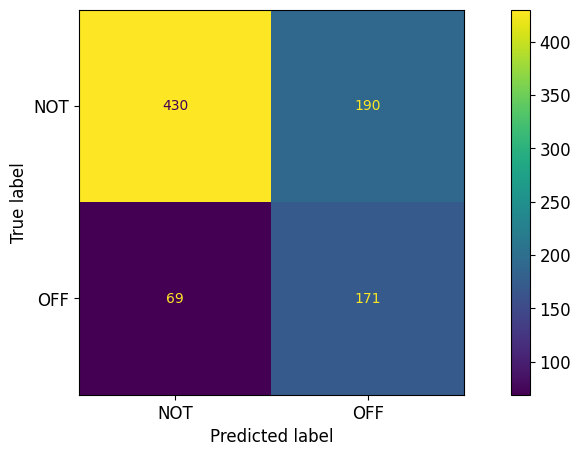

Precision: 0.4737
Recall: 0.7125
F1_Score 0.6687974614843595
ROC Score : 0.7030241935483871


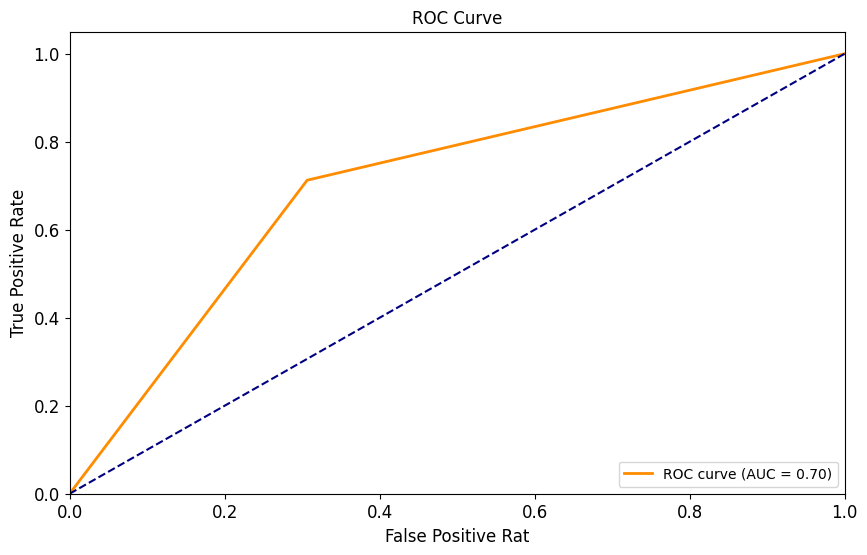

{'precision': 0.47368421052631576,
 'recall': 0.7125,
 'F1_score': 0.6687974614843595,
 'roc_score': 0.7030241935483871}

In [75]:
test_method1(test_file, MODEL_1_50_DIRECTORY, model_1_50_output_test_file)

## BiLSTM - With 75% data in training set

Train data shape : (9235, 2)
train data tensor: (9235, 500)
test data tensor: (927, 500)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,576,193
Trainab

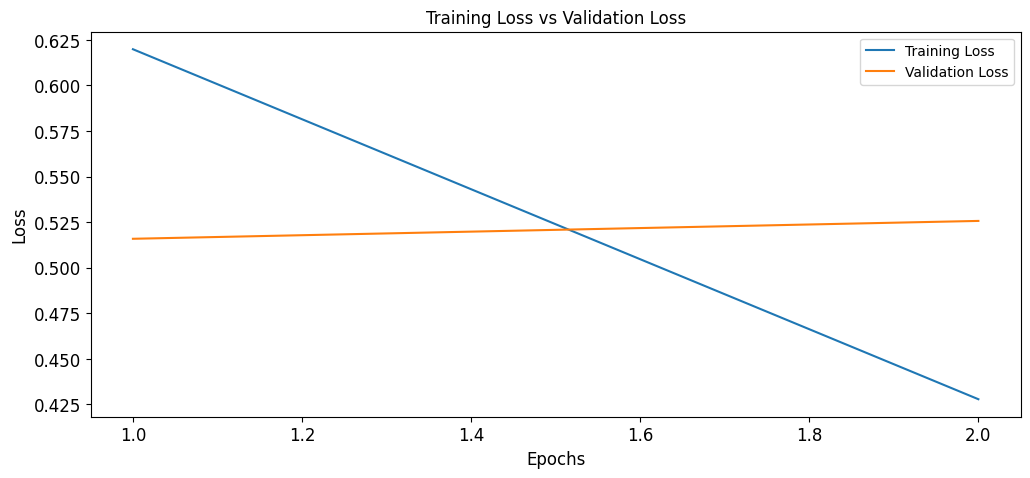

Validation Dataset Accuracy
29/29 [==============================] - 1s 15ms/step
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       619
           1       0.58      0.69      0.63       308

    accuracy                           0.73       927
   macro avg       0.71      0.72      0.71       927
weighted avg       0.75      0.73      0.74       927



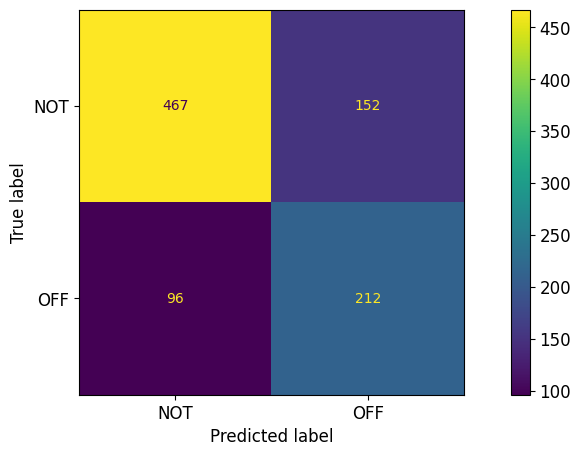

Precision: 0.5824
Recall: 0.6883
F1_Score 0.7105692530819434
ROC Score : 0.7213771688731302


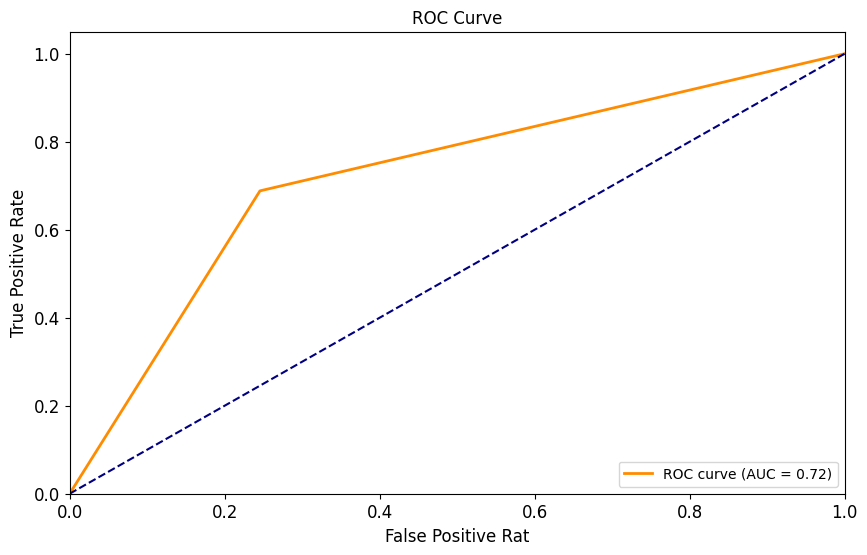

{'precision': 0.5824175824175825,
 'recall': 0.6883116883116883,
 'F1_score': 0.7105692530819434,
 'roc_score': 0.7213771688731302}

In [76]:
train_method1(train_75, val_file, MODEL_1_75_DIRECTORY)

test data tensor: (860, 500)
27/27 [==============================] - 1s 20ms/step - loss: 0.4947 - binary_accuracy: 0.7628 - precision: 0.5709 - recall: 0.6042
{'loss': 0.49466586112976074, 'binary_accuracy': 0.7627906799316406, 'precision': 0.5708661675453186, 'recall': 0.6041666865348816}
27/27 [==============================] - 1s 12ms/step
Test Accuracy: 0.7627906976744186
Test: 0.7627906976744186
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       620
           1       0.57      0.60      0.59       240

    accuracy                           0.76       860
   macro avg       0.71      0.71      0.71       860
weighted avg       0.77      0.76      0.76       860



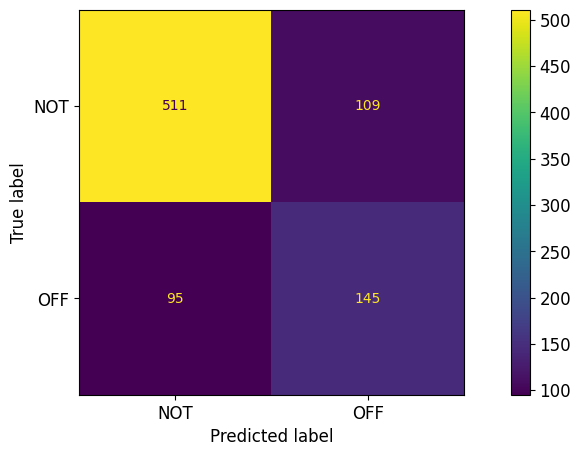

Precision: 0.5709
Recall: 0.6042
F1_Score 0.7103248773206702
ROC Score : 0.7141801075268817


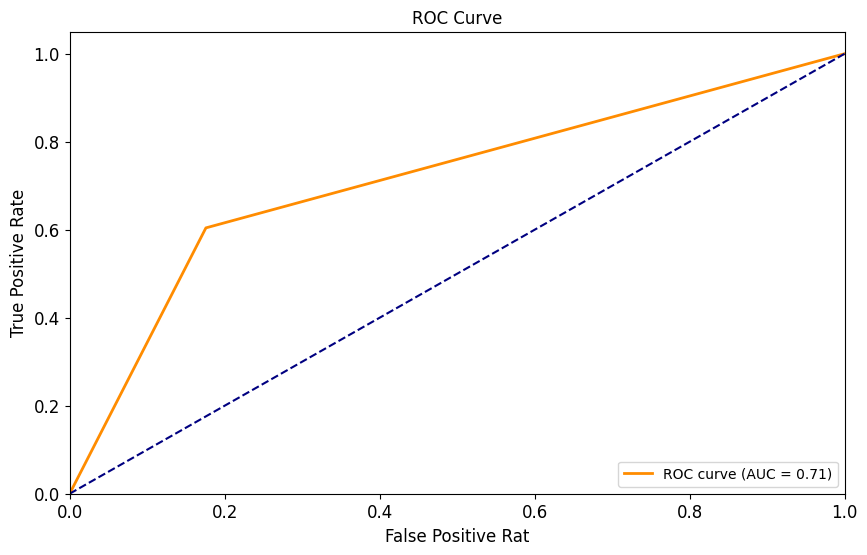

{'precision': 0.5708661417322834,
 'recall': 0.6041666666666666,
 'F1_score': 0.7103248773206702,
 'roc_score': 0.7141801075268817}

In [77]:
test_method1(test_file, MODEL_1_75_DIRECTORY, model_1_75_output_test_file)

## BiLSTM - With 100% dataset

Train data shape : (12313, 2)
train data tensor: (12313, 500)
test data tensor: (927, 500)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 bidirectional_8 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,576,193
Train

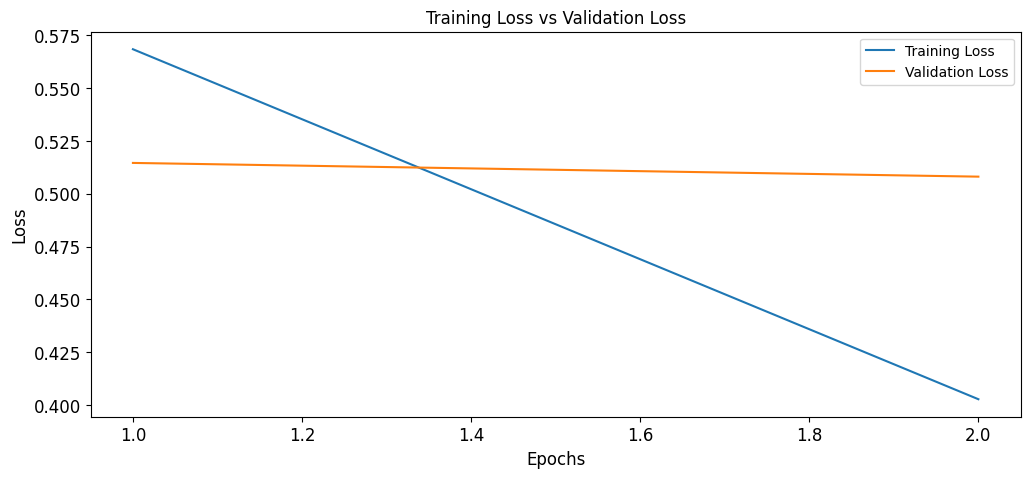

Validation Dataset Accuracy
29/29 [==============================] - 3s 25ms/step
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       619
           1       0.65      0.57      0.60       308

    accuracy                           0.75       927
   macro avg       0.72      0.71      0.71       927
weighted avg       0.75      0.75      0.75       927



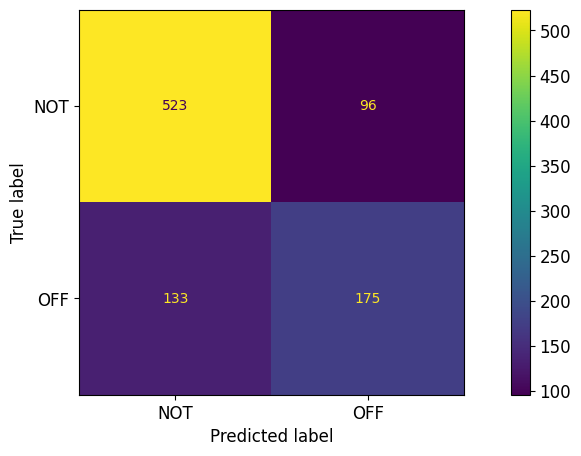

Precision: 0.6458
Recall: 0.5682
F1_Score 0.7124413288631515
ROC Score : 0.7065464825965634


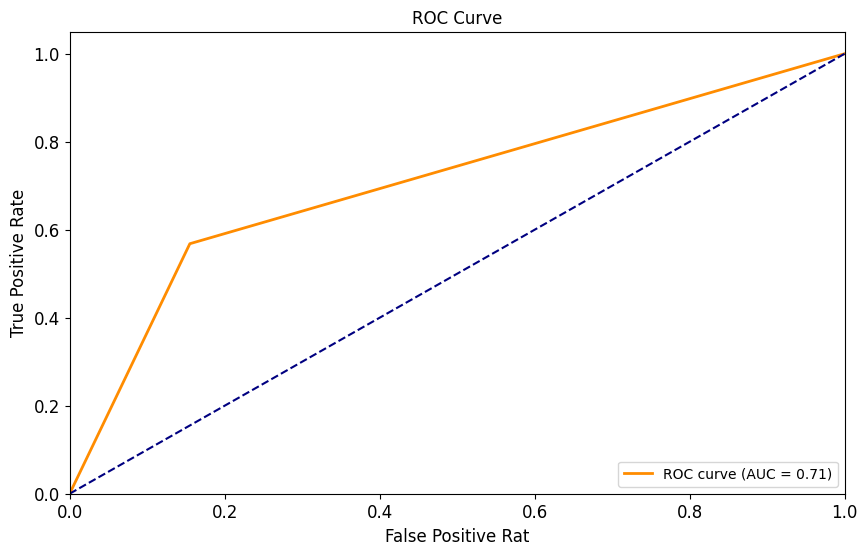

{'precision': 0.6457564575645757,
 'recall': 0.5681818181818182,
 'F1_score': 0.7124413288631515,
 'roc_score': 0.7065464825965634}

In [78]:
train_method1(train_file, val_file, MODEL_1_100_DIRECTORY)

test data tensor: (860, 500)
27/27 [==============================] - 2s 21ms/step - loss: 0.4833 - binary_accuracy: 0.7849 - precision: 0.6503 - recall: 0.4958
{'loss': 0.48330724239349365, 'binary_accuracy': 0.7848837375640869, 'precision': 0.6502732038497925, 'recall': 0.4958333373069763}
27/27 [==============================] - 1s 17ms/step
Test Accuracy: 0.7848837209302325
Test: 0.7848837209302325
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       620
           1       0.65      0.50      0.56       240

    accuracy                           0.78       860
   macro avg       0.74      0.70      0.71       860
weighted avg       0.77      0.78      0.78       860



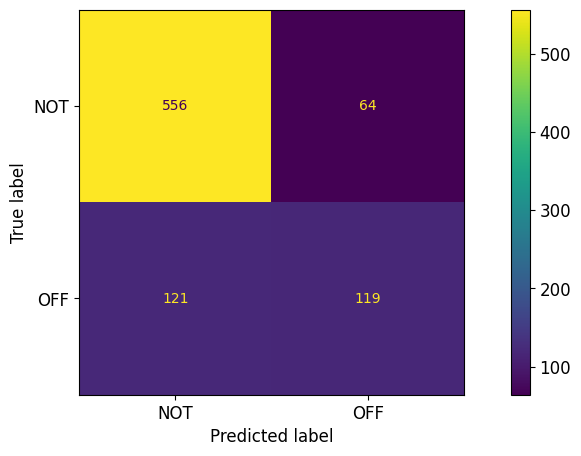

Precision: 0.6503
Recall: 0.4958
F1_Score 0.7100054499290052
ROC Score : 0.6963037634408602


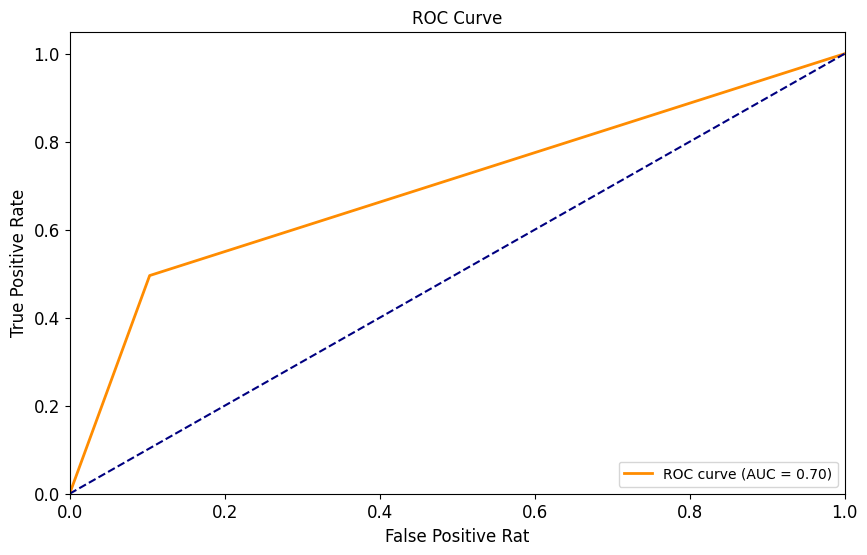

{'precision': 0.6502732240437158,
 'recall': 0.49583333333333335,
 'F1_score': 0.7100054499290052,
 'roc_score': 0.6963037634408602}

In [79]:
test_method1(test_file, MODEL_1_100_DIRECTORY, model_1_output_test_file)

## Method 1 End


## Training Method code 2

This method will be responsible for creating the dataset the format which tokenizer can take it as input. tokenizer, input data and label will be passed to this method and it will give a dictinary containing input id mask, attenstion mask and label.

In [80]:
from transformers import ElectraTokenizer, ElectraForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix
import torch

class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_token_type_ids=False,
            return_attention_mask=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": label,
        }

The training has been done in the methods , once the preprocessing is completed tokenizer will tokenize the data feed to model for training.Once the model is trained it will be evaluated using validation file and save the file to directory.

In [81]:
def train_method2(train_file, val_file, model_dir):

  if not os.path.exists(model_dir):
      os.makedirs(model_dir)
  pre_pro = pre_processing(train_file)                                          #calling the function preprocessing

  train_df = pre_pro.pre_process(train_file)                                    # Preprocessing the data
  val_df = pre_pro.pre_process(val_file)
  
  X_train = train_df['tweet']
  y_train= train_df['label']
  
  X_val= val_df['tweet']
  y_val= val_df['label']

  vectorizer = CountVectorizer()
  vectorizer.fit_transform(X_train)
  vectorizer.fit_transform(X_val)

  with open(model_dir + '/vectorizer.sav', 'wb') as file:                       #Saving the vectorized file
    pickle.dump(vectorizer, file)

  tokenizer = ElectraTokenizer.from_pretrained("google/electra-base-discriminator")     # Load the ELECTRA tokenizer and model
  model = ElectraForSequenceClassification.from_pretrained("google/electra-base-discriminator")

  
  train_dataset = TextClassificationDataset(X_train, y_train, tokenizer, max_length=128)    # Prepare the dataset
  test_dataset = TextClassificationDataset(X_val, y_val, tokenizer, max_length=128)

  
  output_dir = './output'                                                       # Define the training arguments
  learning_rate = 5e-5                                                          #Setting learning rate
  training_args = TrainingArguments(
      output_dir=output_dir,
      per_device_train_batch_size=32,
      num_train_epochs=3,                                                       # setting the number of epochs
      save_steps=10_000,
      save_total_limit=2,
      logging_dir='./logs',  
      logging_steps=100,    
      learning_rate=learning_rate,  
  )

  trainer = Trainer(
      model=model,
      args=training_args,
      train_dataset=train_dataset,
      eval_dataset=test_dataset,
      compute_metrics=None, 
  )

  
  trainer.train()                                                               # Train the model

  trainer.evaluate(test_dataset)                                                # Evaluate the model

  y_pred_probs = trainer.predict(test_dataset).predictions                       # Get predicted labels
  y_pred = torch.argmax(torch.tensor(y_pred_probs), axis=1).tolist()

  y_train_pred_probs = trainer.predict(train_dataset).predictions
  y_train_pred = torch.argmax(torch.tensor(y_train_pred_probs), axis=1).tolist()

  print("Validation dataset Evaluation:")

  compute_performance(y_val, y_pred, model)

  print('Validation: {}'.format(metrics.accuracy_score(y_val, y_pred)))

  tokenizer.save_pretrained(model_dir + '/tokenizer.sav')                       # save the model and tokenizer to drive, which will be used in test dataset
  model_file = model_dir + '/model.sav'

  torch.save({'tokenizer': tokenizer, 'model': model.state_dict()}, model_file)

  return tokenizer

## Testing Method 2 Code

ELECTRA Test method

In this function the model will be used to predict the values in test files and it will be evaluated using compute_performance function.

In [82]:
def test_method2(test_file, model_file, output_dir):
  
  pre_pro = pre_processing(test_file)
  test_df = pre_pro.pre_process(test_file)
  X_test = test_df['tweet']
  y_test = test_df['label']

  checkpoint = torch.load(model_file + '/model.sav')

  tokenizer = ElectraTokenizer.from_pretrained(model_file + '/tokenizer.sav')
 
  model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator', state_dict=checkpoint['model']) # Load the model

  model.eval()
  
  y_pred = []
  for example in X_test:                                                         # Loop through the test dataset and make predictions
      text = example
      inputs = tokenizer.encode_plus(text, return_tensors='pt', padding=True, truncation=True)
      with torch.no_grad():
          outputs = model(**inputs)
          logits = outputs.logits
          predicted_label = torch.argmax(logits, dim=1).item()
          y_pred.append(predicted_label)

  mapping = {0: 'NOT', 1: 'OFF'}
  output_file = pd.read_csv(test_file)
  vfunc = np.vectorize(lambda x: mapping.get(x))
  y_pred_mapped = vfunc(y_pred)
  output_file['out_label'] = y_pred_mapped
  output_file.to_csv(output_dir, index=False)

  print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred)))
  compute = compute_performance(y_test, y_pred, model)
  return compute

## ELECTRA - With 25% Data

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.o

Step,Training Loss
100,0.619200
200,0.473400


Validation dataset Evaluation:
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       619
           1       0.59      0.78      0.67       308

    accuracy                           0.75       927
   macro avg       0.73      0.76      0.73       927
weighted avg       0.78      0.75      0.76       927



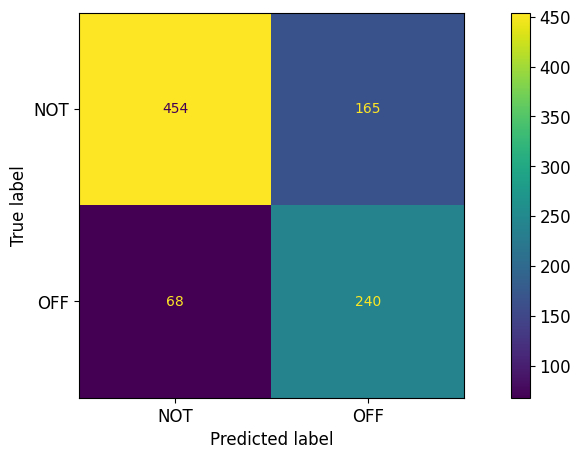

Precision: 0.5926
Recall: 0.7792
F1_Score 0.7345024725487472
ROC Score : 0.7563309065732329


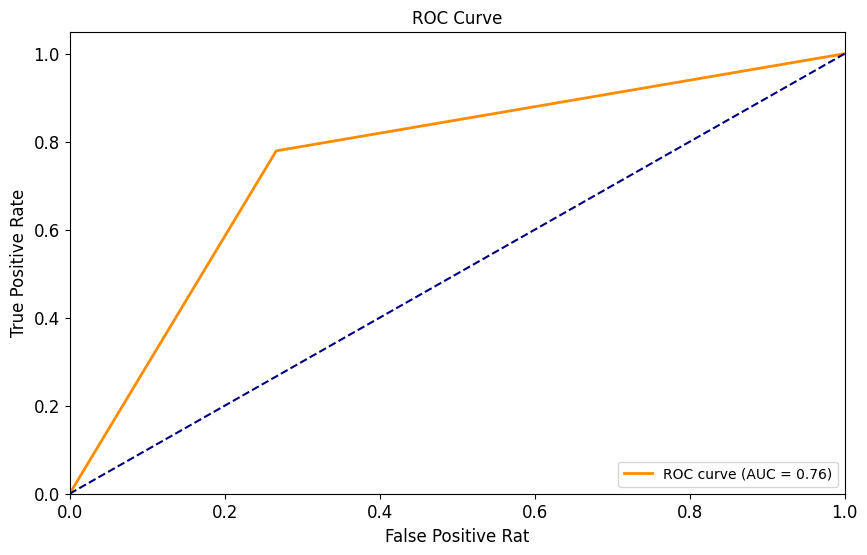

Validation: 0.7486515641855448


ElectraTokenizer(name_or_path='google/electra-base-discriminator', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [83]:
train_method2(train_25, val_file, MODEL_2_25_DIRECTORY)


Test: 0.8244186046511628
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       620
           1       0.66      0.75      0.70       240

    accuracy                           0.82       860
   macro avg       0.78      0.80      0.79       860
weighted avg       0.83      0.82      0.83       860



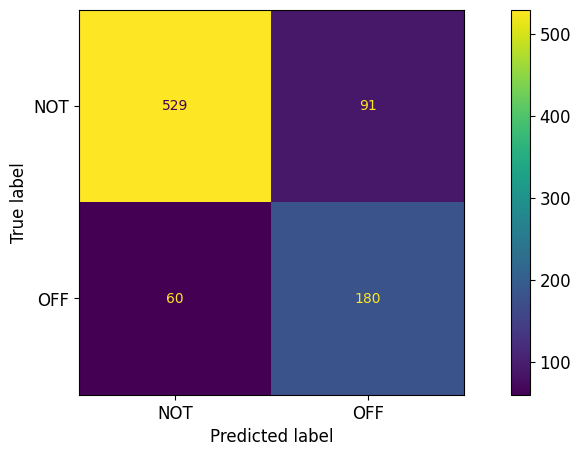

Precision: 0.6642
Recall: 0.7500
F1_Score 0.7898021848530024
ROC Score : 0.8016129032258065


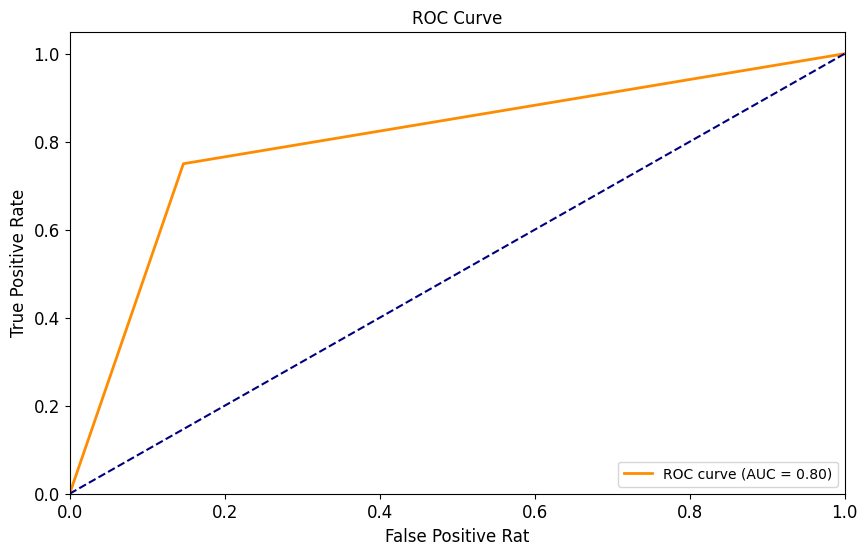

In [84]:
test_method2(test_file, MODEL_2_25_DIRECTORY, model_2_25_output_test_file)

## ELECTRA- With 50% dataset

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.o

Step,Training Loss
100,0.671100
200,0.523400
300,0.462100
400,0.450200
500,0.373500


Validation dataset Evaluation:
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       619
           1       0.60      0.77      0.68       308

    accuracy                           0.76       927
   macro avg       0.74      0.76      0.74       927
weighted avg       0.78      0.76      0.76       927



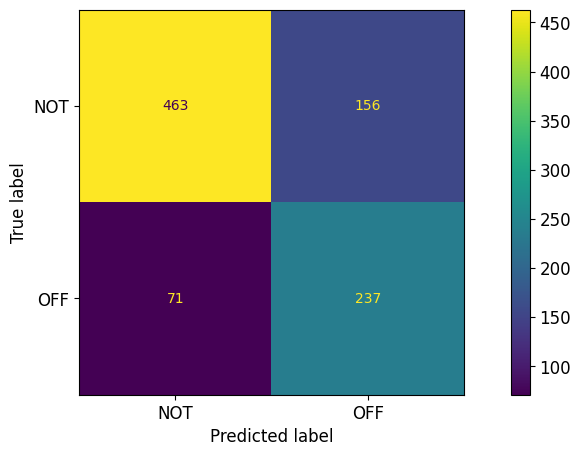

Precision: 0.6031
Recall: 0.7695
F1_Score 0.7396495899180083
ROC Score : 0.7587305666869479


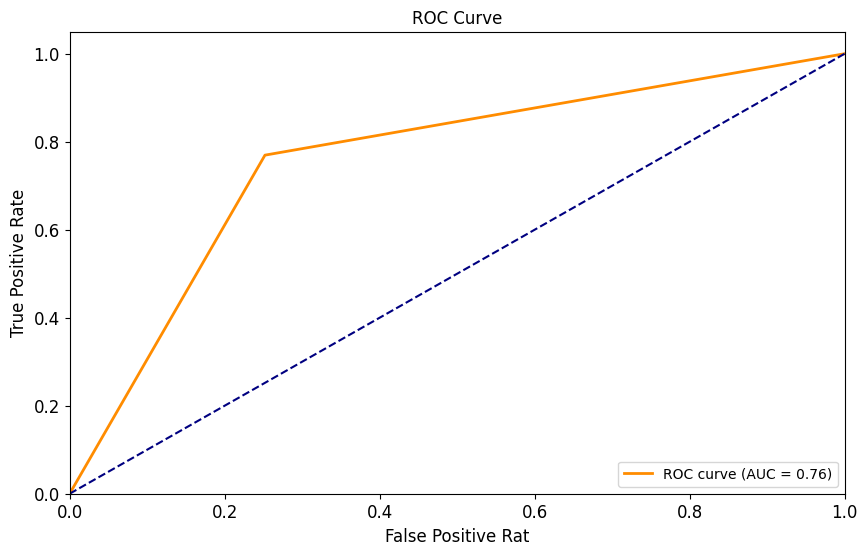

Validation: 0.7551240560949298


ElectraTokenizer(name_or_path='google/electra-base-discriminator', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [85]:
train_method2(train_50, val_file, MODEL_2_50_DIRECTORY)

Test: 0.827906976744186
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       620
           1       0.67      0.75      0.71       240

    accuracy                           0.83       860
   macro avg       0.79      0.80      0.79       860
weighted avg       0.83      0.83      0.83       860



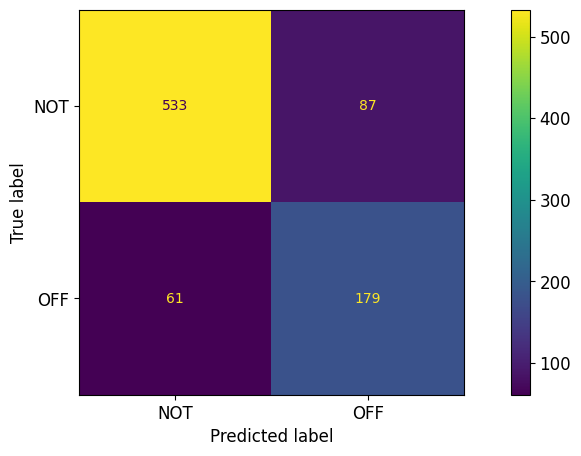

Precision: 0.6729
Recall: 0.7458
F1_Score 0.7927994217658282
ROC Score : 0.802755376344086


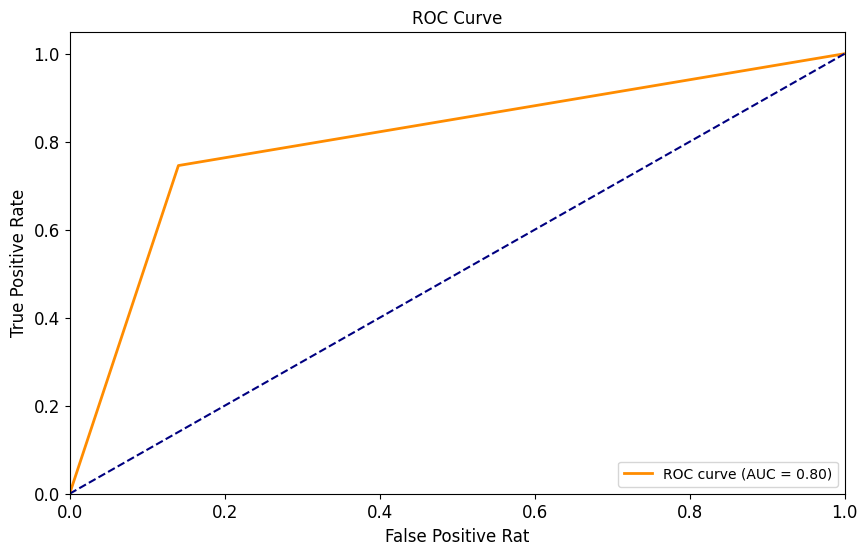

In [86]:
test_method2(test_file, MODEL_2_50_DIRECTORY, model_2_50_output_test_file)

## ELECTRA - With 75% Data

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.o

Step,Training Loss
100,0.635500
200,0.527200
300,0.499000
400,0.443500
500,0.451100
600,0.404000
700,0.367000
800,0.350000


Validation dataset Evaluation:
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       619
           1       0.63      0.75      0.68       308

    accuracy                           0.77       927
   macro avg       0.74      0.76      0.75       927
weighted avg       0.78      0.77      0.77       927



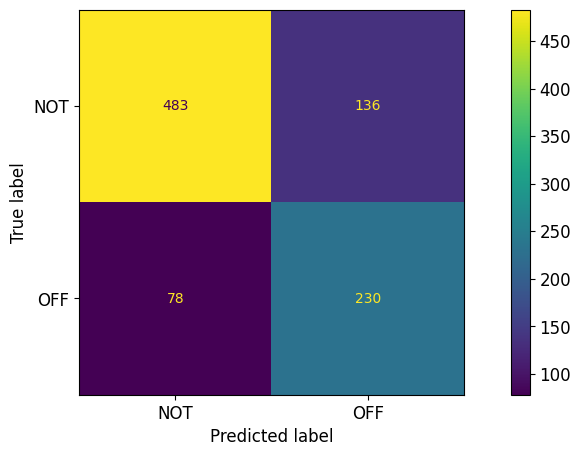

Precision: 0.6284
Recall: 0.7468
F1_Score 0.7505683246994921
ROC Score : 0.7635220191763001


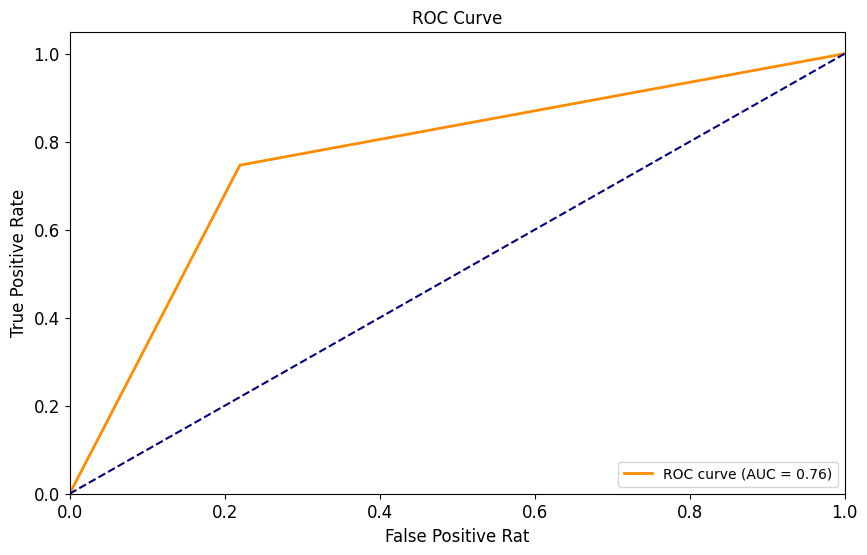

Validation: 0.7691477885652643


ElectraTokenizer(name_or_path='google/electra-base-discriminator', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [87]:
train_method2(train_75, val_file, MODEL_2_75_DIRECTORY)


Test: 0.8290697674418605
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       620
           1       0.68      0.75      0.71       240

    accuracy                           0.83       860
   macro avg       0.79      0.80      0.79       860
weighted avg       0.84      0.83      0.83       860



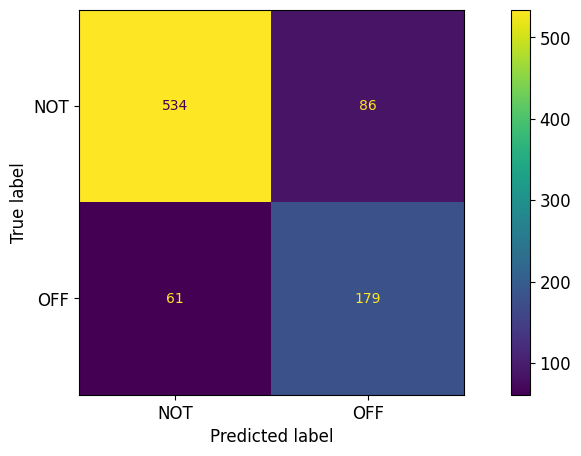

Precision: 0.6755
Recall: 0.7458
F1_Score 0.7939616183840607
ROC Score : 0.8035618279569893


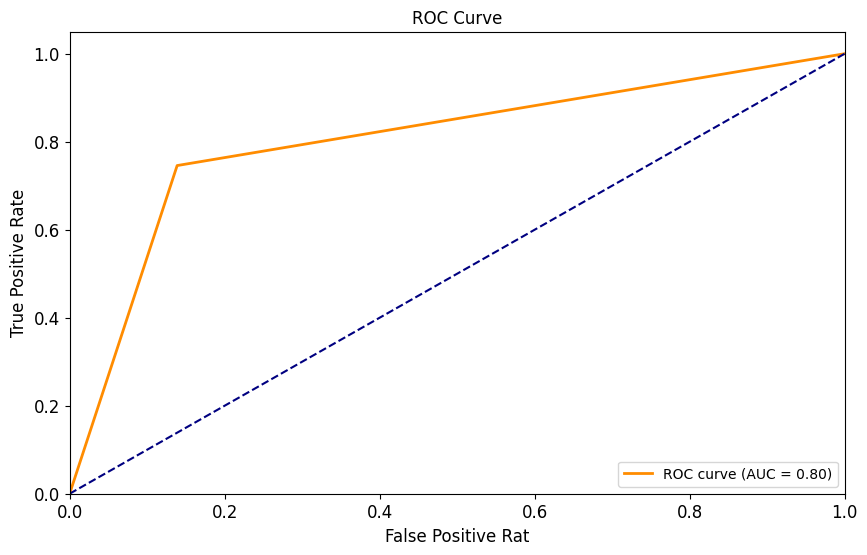

In [88]:
test_method2(test_file, MODEL_2_75_DIRECTORY, model_2_75_output_test_file)

## ELECTRA- With 100% data

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.o

Step,Training Loss
100,0.573400
200,0.503200
300,0.492400
400,0.445200
500,0.416300
600,0.424200
700,0.407000
800,0.397800
900,0.343700
1000,0.342300


Validation dataset Evaluation:
#---------------Evalution Results---------------------#
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       619
           1       0.69      0.70      0.69       308

    accuracy                           0.80       927
   macro avg       0.77      0.77      0.77       927
weighted avg       0.80      0.80      0.80       927



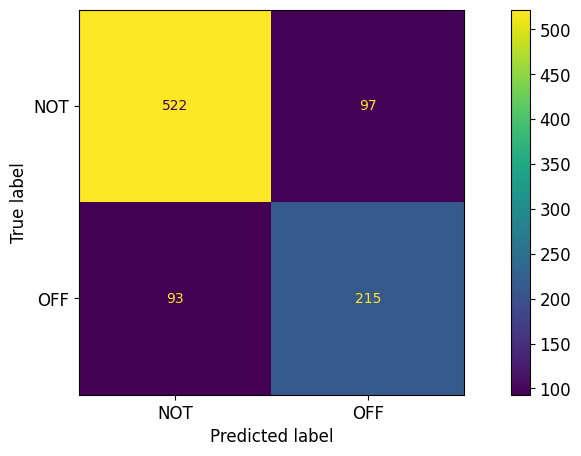

Precision: 0.6891
Recall: 0.6981
F1_Score 0.7697887802582737
ROC Score : 0.7706737930889789


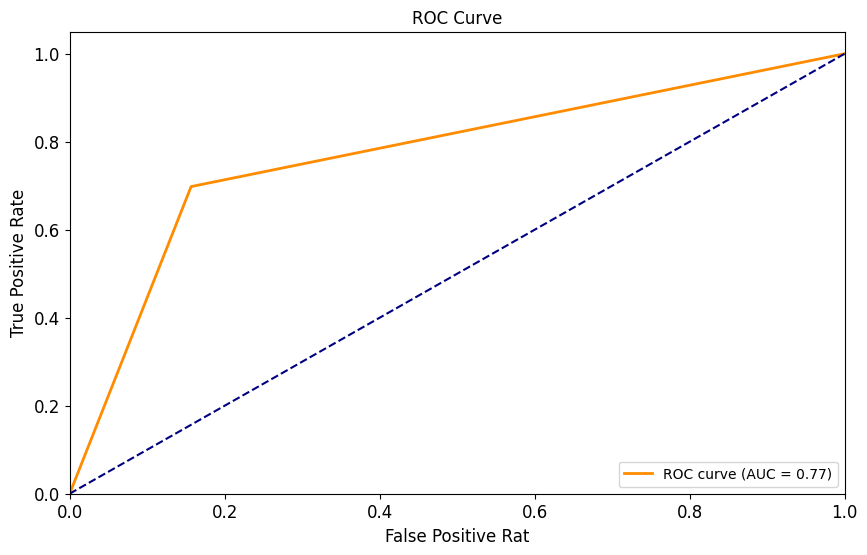

Validation: 0.7950377562028047


ElectraTokenizer(name_or_path='google/electra-base-discriminator', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [89]:
train_method2(train_file, val_file, MODEL_2_100_DIRECTORY)

In [ ]:
test_method2(test_file, MODEL_2_100_DIRECTORY, model_2_100_output_test_file)

## Method 2 End
